In [15]:
#importing all Librabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

Import Data set
link - "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv"

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

Data Analysis

In [17]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Assignning features and target

In [19]:
# Feature -> Temperature  
# Target ->Revenue
X = np.array(df['Temperature'])
y = np.array(df['Revenue'])

Spllinting the  data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05)

Model Selection

In [22]:
from sklearn.ensemble import RandomForestRegressor


In [23]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

Train model

In [24]:
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [28]:
pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [29]:
pred.head()

,Actual,Predicted
0,612.153949,608.591035
1,739.387272,748.846866
2,322.983977,373.313366
3,536.208182,545.443545
4,441.508733,473.121462


Data Visualization

Text(0.5, 1.0, 'Temp vs Rev')

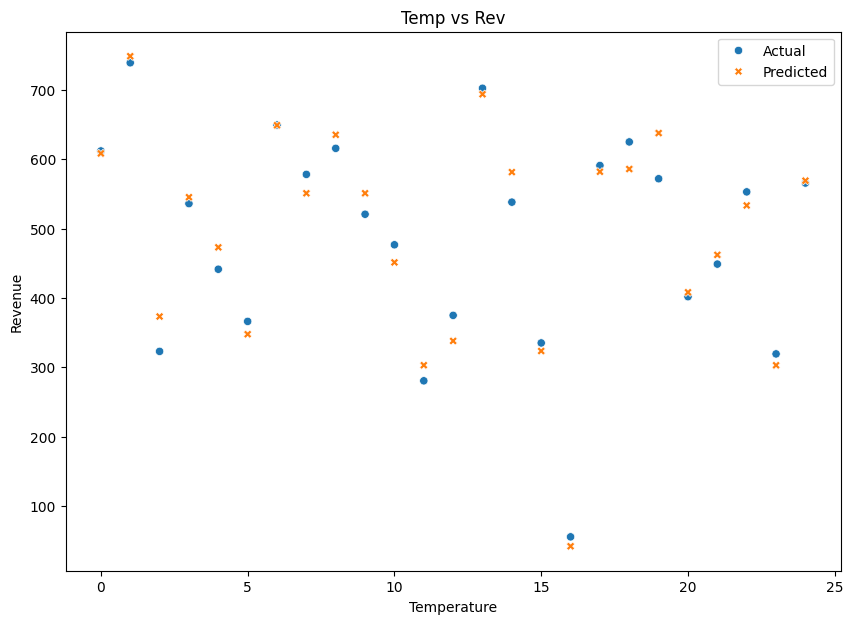

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(pred)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temp vs Rev')

Text(0.5, 1.0, 'Temp vs Rev')

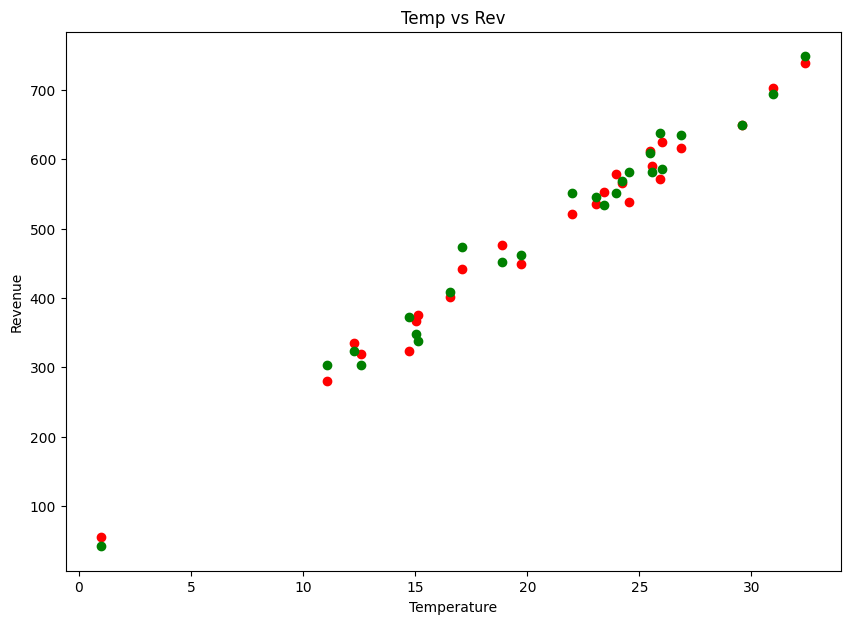

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,y_test, color = "Red")
plt.scatter(X_test,y_pred, color = "green")   
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temp vs Rev')

<Axes: >

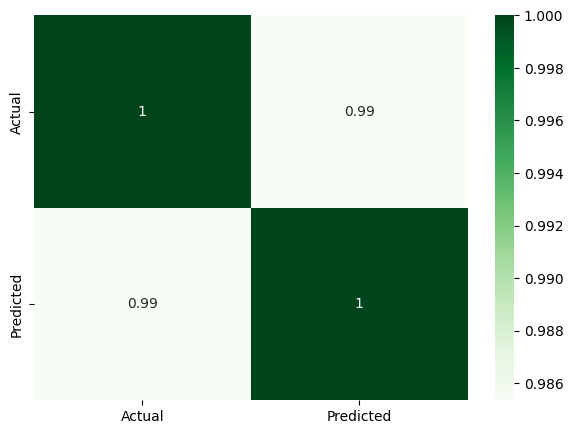

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(pred.corr(), annot=True, cmap='Greens')

In [40]:
from sklearn.metrics import r2_score, root_mean_squared_error,mean_absolute_error, mean_squared_error
print(r2_score(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9692573450562375
26.61677772465067
21.395199206599976
708.4528564434602
